<a href="https://colab.research.google.com/github/Carolved/Deep_Learing.Assignment/blob/main/Hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
employees_left = df[df['left']==1]
employees_left.shape

employees_retained = df[df['left']==0]
employees_retained.shape


(11428, 10)

In [ ]:
df.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


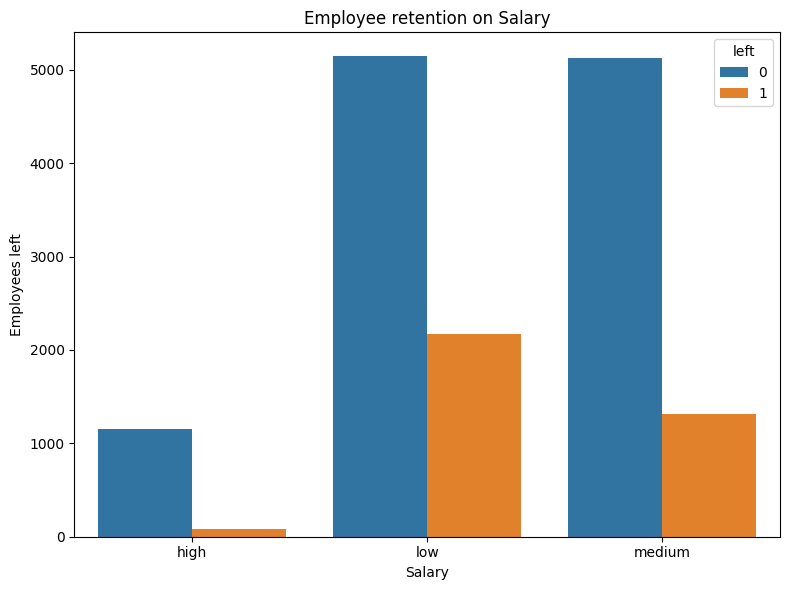

In [ ]:
left_count = df.groupby(['salary', 'left']).size().reset_index(name='count')
left_count.head()

plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='count', hue='left', data=left_count, errorbar=None)
plt.xlabel('Salary')
plt.ylabel('Employees left')
plt.title('Employee retention on Salary')
plt.tight_layout()
plt.show()


In [ ]:
left_per_dept = df.groupby(['Department', 'left']).size().reset_index(name='count')
left_per_dept.head()


,Department,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


In [ ]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
salary_dummies = pd.get_dummies(df1.salary, prefix='salary')
salary_dummies.head()

salary_dummies = salary_dummies.astype(int)
salary_dummies.head()

df_with_dummies = pd.concat([df1, salary_dummies], axis='columns')
df_with_dummies.head()

#droping original salary coloumn
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head()

X = df_with_dummies
X.head()



,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left
y.head()



,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
3052,0.99,232,0,0,1,0
8468,0.66,208,0,0,0,1
2641,0.87,246,0,0,0,1
9763,0.39,161,0,0,0,1
10110,0.92,179,0,0,1,0
...,...,...,...,...,...,...
14197,0.48,142,0,0,0,1
14512,0.12,278,0,0,0,1
30,0.09,294,0,0,1,0
5306,0.21,218,0,0,1,0


In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

model.fit(X_train, y_train)

model.predict(X_test)



array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, y_test)



0.7717777777777778